Calibration of the optical lattice depth
====
$$
\def\bra#1{\mathinner{\left\langle{#1}\right|}}
\def\ket#1{\mathinner{\left|{#1}\right\rangle}}
\def\braket#1#2{\mathinner{\left\langle{#1}\middle|#2\right\rangle}}
$$
The initial state of an atom should be $\ket{\Psi(t<0)} = \ket{\boldsymbol{k}=0}$ as the momentum distribution of a BEC has a very sharp peak at $\boldsymbol{k}=0$. A BEC suddenly loaded into a lattice can be described as superposition of Bloch states $\ket{\boldsymbol{q},n}$:
\begin{equation}
\ket{\Psi(t=0)} = \sum_{n=0}^{\infty} \ket{\boldsymbol{q},n} \braket{\boldsymbol{q},n}{ \boldsymbol{k}=0}.   \\
\end{equation}
Recalling 
\begin{equation}
\ket{q,n} = \sum_{m=0,\pm 1, \cdots} \sum_{m'=0,\pm 1, \cdots} A_{m,m'}^{\boldsymbol{q},n} \ket{q_1+m K_1, q_2+m' K_2}, \\
\end{equation}
we get
\begin{equation}
\braket{\boldsymbol{q},n}{\boldsymbol{k}=0} = (A_{m=0,m'=0}^{\boldsymbol{q}=\boldsymbol{0},n})^{\ast}.
\end{equation}
Then, while the BEC wavepacket is held in the lattice, it evolves in time according to
\begin{equation}
\ket{\Psi(t)} = \sum_{n=0}^{\infty} (A_{m=0,m'=0}^{\boldsymbol{q}=\boldsymbol{0},n})^{\ast} {\rm{exp}} \left( -i \frac{E_{\boldsymbol{q},n}}{\hbar} t \right) \ket{\boldsymbol{q},n}. \\
\end{equation}
Projecting the above onto the plane-wave basis, we obtain the coefficients $B_{m,m'}^{\boldsymbol{q}}$ of each $\ket{q_1+mK_1,q_2+m'K_2}$ in the lattice frame:
\begin{equation}
B_{m,m'}^{\boldsymbol{q}} = \sum_{n=0}^{\infty} (A_{l=0,l'=0}^{\boldsymbol{q'}=\boldsymbol{0},n})^{\ast} A_{m,m'}^{\boldsymbol{q}}  \left( -i \frac{E_{\boldsymbol{q},n}}{\hbar} t \right) . \\
\end{equation}
$q$ is a parameter, but usually chosen to zero as momentum of a BEC does not change during pulsed lattice.

Parameters
===

In [1]:
# -*- coding: utf-8 -*-

import numpy as np
lam = 1 # Normalized wavelength
d = lam/2 # lattice constant
k = 2*np.pi/lam # wave number
k1 = k*np.array([0,-1]) # reciprocal lattice vector 1
k2 = k*np.array([np.sqrt(3)/2, 1/2]) # reciprocal lattice vector 2
k3 = k*np.array([-np.sqrt(3)/2, 1/2]) # reciprocal lattice vector 3

v_s = 0
v_e =20
v_num = 100

v23_p=1
v31_p=1
v12_list = np.linspace(v_s,v_e,v_num)
v23_list = v23_p * np.linspace(v_s,v_e,v_num)
v31_list = v31_p*np.linspace(v_s,v_e,v_num)

t_pulse = 100*10**(-6) #pulse time[s]

n = 11 # include (2n+1)^2 plane waves in calculation <=> calculate over (2n+1)^2 bands
m = 10 # calculate over (2m(+1))^2 quasimomenta

Definition of Physical constant
---

In [2]:
lambda_L = 1064*10**(-9) #wave lenght of triangular lattice beam [m] 
h_bar = 1.054571596*10**(-34) #Converted Plank const
mrb = 87*1.66053873*10**(-27) #Single atom mass of 87Rb
er = h_bar**2/(2*mrb)*(2*np.pi/lambda_L)**2 #Recoil energy of 1064nm lattice

Hamiltonian
===

In [3]:
nq_list = np.array([(0,0)])

Nsite=2*n+1
l_list = [(x, y) for x in np.linspace(-n, n, Nsite, dtype=np.int) for y in np.linspace(-n, n, Nsite, dtype=np.int)]
E = np.zeros([len(nq_list), Nsite**2],dtype =complex)
C = np.zeros([Nsite**2, len(nq_list), Nsite**2],dtype =complex)
H_tmp = np.zeros([Nsite**2, Nsite**2])

l_list_1 = np.array(l_list)[:, 0]
l_list_2 = np.array(l_list)[:, 1]
l2, l1 = np.meshgrid(l_list_1, l_list_1)
m2, m1 = np.meshgrid(l_list_2, l_list_2)

l_diffs_1 = l1 - l2
l_diffs_2 = m1 - m2
l_diffs = l_diffs_1 * l_diffs_2
condition_1 = (np.abs(l_diffs_1) == 1) * (m1 == m2)
condition_2 = (l1 == l2) * (np.abs(l_diffs_2) == 1)
condition_3 = (l_diffs == 1)


Time evolution according to Schrodinger eq.
---

In [4]:
m_list = [(0,0),(0,1),(1,0),(0,-1),(-1,0),(1,1),(-1,-1),(-1,1),(1,-1),(2,1),(1,2),(-2,-1),(-1,-2),(2,0),(-2,0),(0,2),(0,-2),(2,2),(-2,-2)]
pm = np.zeros([len(v12_list),len(m_list)])

for i_v, v_temp in enumerate(v12_list):
    H_tmp = np.zeros([Nsite**2, Nsite**2])
    H_tmp[condition_1 == 1] = -v12_list[i_v]/4
    H_tmp[condition_2 == 1] += -v23_list[i_v]/4
    H_tmp[condition_3 == 1] += -v31_list[i_v]/4
    for i_n, n_temp in enumerate(nq_list):
        H = np.copy(H_tmp)
        K = 3 * ((n_temp[0] - l1)**2 + (n_temp[1] - m1)**2 - (n_temp[0] - l2) * (n_temp[1] - m2))
        H += ((l1 == l2) * (m1 == m2)) * K
        E0, P = np.linalg.eig(H)
        rearrangedEvalsVecs = sorted(zip(E0, P.T), key=lambda x: x[0].real, reverse=False)
        E[i_n, :], tmp = map(list, zip(*rearrangedEvalsVecs))
        C[:, i_n, :] = np.array(tmp)
    for i_m, mp in enumerate(m_list):
        pm[i_v,i_m] =np.abs(np.sum(P[Nsite*(n+mp[0])+n+mp[1],:]*P[Nsite*n+n,:]*np.exp(-1.j*E0*er/h_bar*t_pulse)))**2 

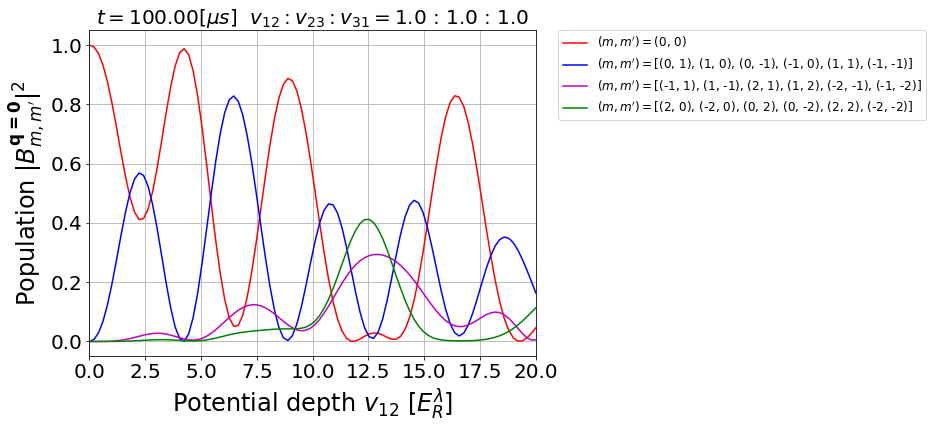

In [5]:
import matplotlib.pyplot as plt
pulse_label = '{:.2f}'.format(t_pulse*10**6)
propotion_label = '{:.1f} : {:.1f} : {:.1f}'.format(1,v23_p,v31_p)
plt.figure(figsize=[8,6])
# list(map(lambda x: plt.plot(v12_list,pm[:,x],label=r"$(m,m^{\prime})=$"+str(m_list[x])), range(len(m_list))))
plt.plot(v12_list, pm[:,0],label=r"$(m,m^{\prime})=$"+str(m_list[0]),c='red')
plt.plot(v12_list, np.sum(pm[:,1:7],axis=1),label=r"$(m,m^{\prime})=$"+str(m_list[1:7]),c='blue')
plt.plot(v12_list, np.sum(pm[:,7:13],axis=1),label=r"$(m,m^{\prime})=$"+str(m_list[7:13]),c='m')
plt.plot(v12_list, np.sum(pm[:,13:19],axis=1),label=r"$(m,m^{\prime})=$"+str(m_list[13:19]),c='green')
plt.xlim(min(v12_list),max(v12_list))
plt.xlabel(r'Potential depth $v_{12}$ [$E_R^{\lambda}$]', fontsize=24)
plt.ylabel(r'Population $|B_{m,m^{\prime}}^{\bf{q}=\bf{0}}|^2$', fontsize=24)
plt.xticks(fontsize="20")
plt.yticks(fontsize="20")
plt.title(r'$t=$'+pulse_label+r'$[\mu s] $  $v_{12} : v_{23} : v_{31} = $'+propotion_label, fontsize=20)
# list(map(lambda x: plt.axvline(x=1/gap[x]*10**6, label=gap_name_list[x],c=colorlist[x],linestyle='--') , range(len(band_index_list))))
lg=plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0, fontsize=12)
lg.get_title().set_fontsize(15)
plt.grid()

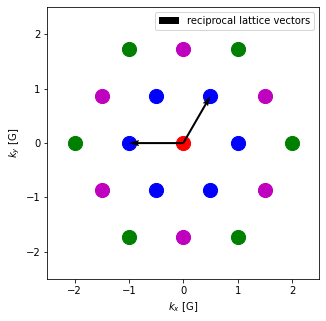

In [7]:
k1 = np.array([-1,0]) # reciprocal lattice vector 1
k2 = np.array([1/2, np.sqrt(3)/2]) # reciprocal lattice vector 2

center = m_list[0][0]*k1 + m_list[0][1]*k2 
peak_1st = np.transpose(list(map(lambda x: x[0]*k1+x[1]*k2, m_list[1:7])))
peak_2nd = np.transpose(list(map(lambda x: x[0]*k1+x[1]*k2, m_list[7:13])))
peak_3rd = np.transpose(list(map(lambda x: x[0]*k1+x[1]*k2, m_list[13:19])))
fig = plt.figure(figsize=[5,5])
ax1 = fig.add_subplot(1,1,1)
# ax1.grid()
ax1.scatter(center[0],center[1],s=200,c='red')
ax1.scatter(peak_1st[0],peak_1st[1],s=200,c='blue')
ax1.scatter(peak_2nd[0],peak_2nd[1],s=200,c='m')
ax1.scatter(peak_3rd[0],peak_3rd[1],s=200,c='green')
ax1.quiver(0,0,k1[0],k1[1],angles='xy', scale_units='xy', scale=1,label='reciprocal lattice vectors')
ax1.quiver(0,0,k2[0],k2[1],angles='xy', scale_units='xy', scale=1)
ax1.set_aspect('equal')
ax1.set_xlim(-2.5,2.5)
ax1.set_ylim(-2.5,2.5)
ax1.set_xlabel(r'$k_x$ [G]')
ax1.set_ylabel(r'$k_y$ [G]')
ax1.legend()